In [1]:
!pip install -U pandas

Requirement already up-to-date: pandas in /anaconda/envs/azureml_py38/lib/python3.8/site-packages (2.0.3)


In [2]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /anaconda/envs/azureml_py38/lib/python3.8/site-packages (0.13.0)


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('./mobile_price_classification.csv')

In [5]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14.0,0,5,0.1,193.0,...,226,1412,3476.0,12,7,2,0,1,0,1
1,2,841,1,0.5,1,4.0,1,61,0.8,191.0,...,746,857,NaN,6,0,7,1,0,0,2
2,3,1807,1,2.8,0,1.0,0,27,0.9,186.0,...,1270,1366,2396.0,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18.0,1,25,0.5,96.0,...,295,1752,3893.0,10,0,7,1,1,0,2
4,5,1434,0,1.4,0,11.0,1,49,0.5,108.0,...,749,810,1773.0,15,8,7,1,0,1,1


In [6]:
data.shape


(2002, 22)

In [7]:
data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
data = data.drop('id',axis=1)

In [9]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2002.000000,2002.000000,2002.000000,2002.000000,1995.000000,2002.000000,2002.000000,1997.000000,1996.000000,2002.000000,...,2002.000000,2002.000000,2000.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,1249.029471,0.515984,1.540410,0.516983,4.595489,0.486513,33.638861,0.517176,140.715932,4.329171,...,627.075924,1239.943556,2143.210000,11.997003,5.312687,11.081918,0.755744,0.500500,0.506993,1.500500
std,432.497887,0.499869,0.828973,0.499836,4.461052,0.499943,18.120700,0.280513,45.177932,2.286793,...,432.615350,439.538647,1099.051021,4.318873,4.238177,5.495196,0.429752,0.500125,0.500076,1.118313
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,110.000000,2.000000,...,264.000000,832.000000,1237.250000,8.000000,2.000000,6.250000,1.000000,0.000000,0.000000,1.000000
50%,1247.000000,1.000000,1.500000,1.000000,3.000000,0.000000,34.000000,0.500000,139.000000,4.000000,...,564.500000,1250.000000,2156.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1629.750000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,171.000000,6.000000,...,902.000000,1639.250000,3067.000000,16.000000,8.000000,16.000000,1.000000,1.000000,1.000000,2.750000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,970.000000,8.000000,...,1907.000000,1998.000000,7300.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
data = data.rename(columns = {"blue":"bluetooth",
                              "fc": "fc_megapixel",
                              "pc": "pc_megapixel",
                              "m_dep": "m_depth"})
data

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixel,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14.0,0,5,0.1,193.0,3,...,226,1412,3476.0,12,7,2,0,1,0,1
1,841,1,0.5,1,4.0,1,61,0.8,191.0,5,...,746,857,NaN,6,0,7,1,0,0,2
2,1807,1,2.8,0,1.0,0,27,0.9,186.0,3,...,1270,1366,2396.0,17,10,10,0,1,1,2
3,1546,0,0.5,1,18.0,1,25,0.5,96.0,8,...,295,1752,3893.0,10,0,7,1,1,0,2
4,1434,0,1.4,0,11.0,1,49,0.5,108.0,6,...,749,810,1773.0,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1700,1,1.9,0,0.0,1,54,0.5,170.0,7,...,644,913,2121.0,14,8,15,1,1,0,0
1998,609,0,1.8,1,0.0,0,13,0.9,186.0,4,...,1152,1632,1933.0,8,1,19,0,1,1,2
1999,1185,0,1.4,0,1.0,1,8,0.5,80.0,1,...,477,825,1223.0,5,0,14,1,0,0,3
2000,1533,1,0.5,1,0.0,0,50,0.4,171.0,2,...,38,832,2509.0,15,11,6,0,1,0,0


In [11]:
dupes = data.duplicated()
dupes.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
sum(dupes)

260

In [13]:
data = data.drop_duplicates()
data.shape

(1742, 21)

In [14]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
data.isna().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
data['fc_megapixel'].fillna(0)
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [17]:
len(data['ram'].unique())

875

In [18]:
data['ram'] = data['ram'].fillna(method='backfill')
len(data['ram'].unique())

/tmp/ipykernel_39351/2461757139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ram'] = data['ram'].fillna(method='backfill')


874

In [19]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [20]:
data['mobile_wt'] = data['mobile_wt'].fillna(data['mobile_wt'].median())

/tmp/ipykernel_39351/4148391416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mobile_wt'] = data['mobile_wt'].fillna(data['mobile_wt'].median())


In [21]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [22]:
data['mobile_wt'].head()

0    193.0
1    191.0
2    186.0
3     96.0
4    108.0
Name: mobile_wt, dtype: float64

In [23]:
data = data.dropna()

In [24]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [25]:
data.shape

(1730, 21)

In [26]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc_megapixel',
       'four_g', 'int_memory', 'm_depth', 'mobile_wt', 'n_cores',
       'pc_megapixel', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [27]:
data.to_csv('mobile_data_cleaned.csv', index = False)
!ls

DataCleaningAndPreprocessing.ipynb	   fillingmissingvalues.ipynb.amltmp
FillingMissingValues.ipynb		   mobile_data_cleaned.csv
datacleaningandpreprocessing.ipynb.amltmp  mobile_price_classification.csv


In [28]:
numeric_data = data.drop(['bluetooth','dual_sim','four_g','three_g','touch_screen','wifi','price_range'],axis=1)
numeric_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1043,1.8,14.0,5,0.1,193.0,3,16,226,1412,3476.0,12,7,2
1,841,0.5,4.0,61,0.8,191.0,5,12,746,857,2396.0,6,0,7
2,1807,2.8,1.0,27,0.9,186.0,3,4,1270,1366,2396.0,17,10,10
3,1546,0.5,18.0,25,0.5,96.0,8,20,295,1752,3893.0,10,0,7
4,1434,1.4,11.0,49,0.5,108.0,6,18,749,810,1773.0,15,8,7


In [29]:
categorical_data = data[['bluetooth','dual_sim','four_g','three_g','touch_screen','wifi','price_range']]
categorical_data

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,1,1,0,0,1,0,1
1,1,1,1,1,0,0,2
2,1,0,0,0,1,1,2
3,0,1,1,1,1,0,2
4,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...
1995,1,1,1,1,1,1,3
1996,1,1,0,1,1,1,3
1997,1,0,1,1,1,0,0
1999,0,0,1,1,0,0,3


In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: ylabel='ram'>

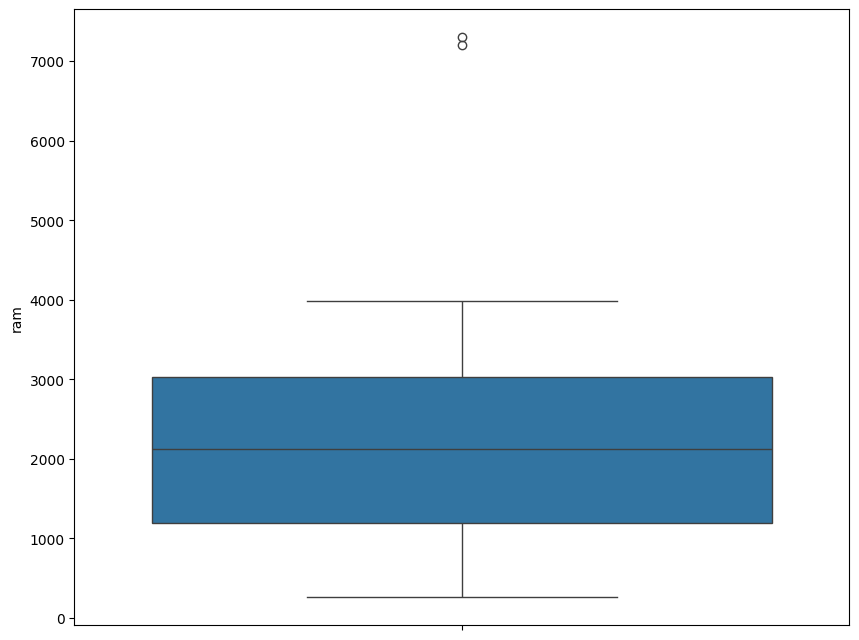

In [31]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(numeric_data['ram'],orient='v')

<Axes: ylabel='mobile_wt'>

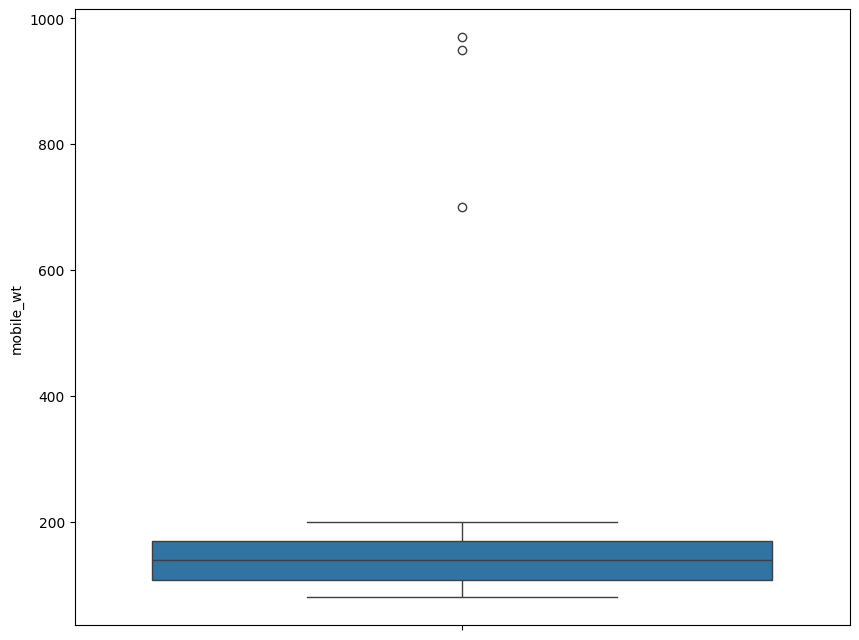

In [32]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(numeric_data['mobile_wt'],orient='v')

/tmp/ipykernel_39351/2100586499.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(bp.get_xticklabels(),rotation=90)


[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

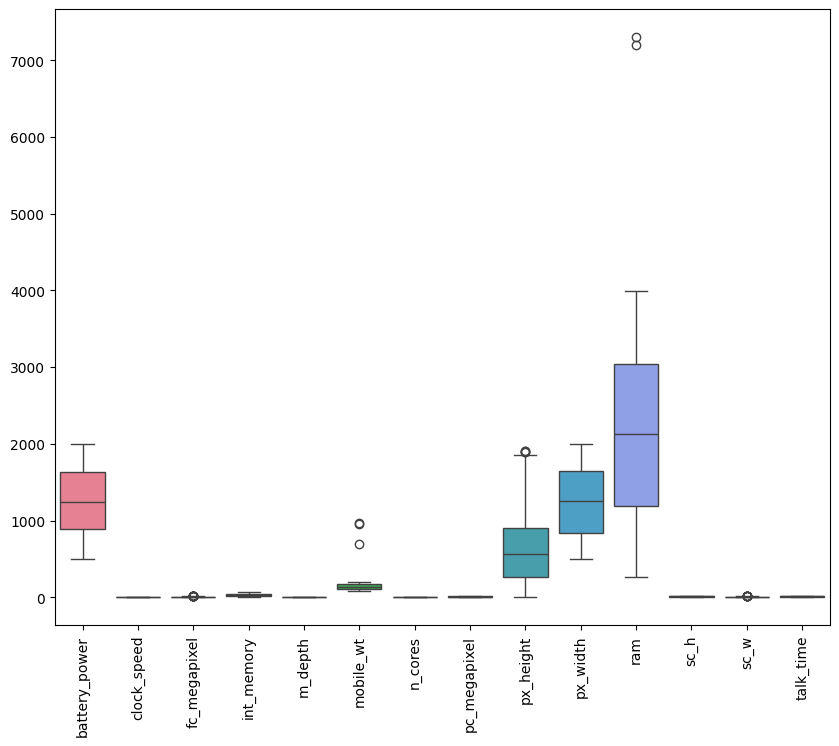

In [33]:
fig, ax = plt.subplots(figsize = (10,8))
bp = sns.boxplot(data=numeric_data)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(numeric_data)

In [35]:
scaled_data = pd.DataFrame(scaled_array,columns=numeric_data.columns)
scaled_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.478081,0.299832,2.125235,-1.583724,-1.489038,1.132057,-0.586956,0.972841,-0.921551,0.381529,1.225895,0.009469,0.395428,-1.665833
1,-0.943658,-1.261822,-0.126239,1.501188,1.011621,1.089055,0.292588,0.318417,0.268529,-0.879236,0.251074,-1.374837,-1.266137,-0.750540
2,1.282816,1.501105,-0.801681,-0.371794,1.368858,0.981547,-0.586956,-0.990431,1.467763,0.277034,0.251074,1.163057,1.107527,-0.201364
3,0.681253,-1.261822,3.025824,-0.481970,-0.060090,-0.953583,1.611904,1.627265,-0.763637,1.153890,1.602284,-0.451967,-1.266137,-0.750540
4,0.423111,-0.180677,1.449793,0.840135,-0.060090,-0.695566,0.732360,1.300053,0.275394,-0.986004,-0.311254,0.701622,0.632794,-0.750540


In [36]:
scaled_data.describe()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,-1.026796e-18,1.889304e-16,-9.857240e-17,1.904706e-16,8.317046e-17,-5.750057e-17,1.345103e-16,1.304031e-16,1.067868e-16,2.587526e-16,-1.868768e-16,1.909840e-16,-8.419726e-17,7.598289e-17
std,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00,1.000289e+00
min,-1.729608e+00,-1.261822e+00,-1.026828e+00,-1.748987e+00,-1.489038e+00,-1.297606e+00,-1.466500e+00,-1.644855e+00,-1.438778e+00,-1.687943e+00,-1.674198e+00,-1.605555e+00,-1.266137e+00,-1.665833e+00
25%,-8.186208e-01,-1.021568e+00,-8.016807e-01,-8.675837e-01,-7.745642e-01,-6.955656e-01,-1.026728e+00,-8.268251e-01,-8.368723e-01,-9.360273e-01,-8.383791e-01,-9.134018e-01,-7.914044e-01,-7.505402e-01
50%,-1.480826e-02,-6.054970e-02,-3.513860e-01,1.381969e-02,-6.009016e-02,-2.902074e-02,-1.471838e-01,-8.795005e-03,-1.434221e-01,2.601630e-02,4.660714e-03,9.468759e-03,-7.930508e-02,-1.830586e-02
75%,8.886886e-01,9.004684e-01,5.492033e-01,8.401353e-01,1.011621e+00,6.160227e-01,7.323602e-01,9.728411e-01,6.415728e-01,9.136634e-01,8.278431e-01,9.323393e-01,6.327942e-01,8.969870e-01
max,1.725345e+00,1.741359e+00,3.250971e+00,1.666451e+00,1.726095e+00,1.783868e+01,1.611904e+00,1.627265e+00,2.925610e+00,1.712716e+00,4.677484e+00,1.624492e+00,3.006458e+00,1.629221e+00


/tmp/ipykernel_39351/2274676097.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(bp.get_xticklabels(),rotation=90)


[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

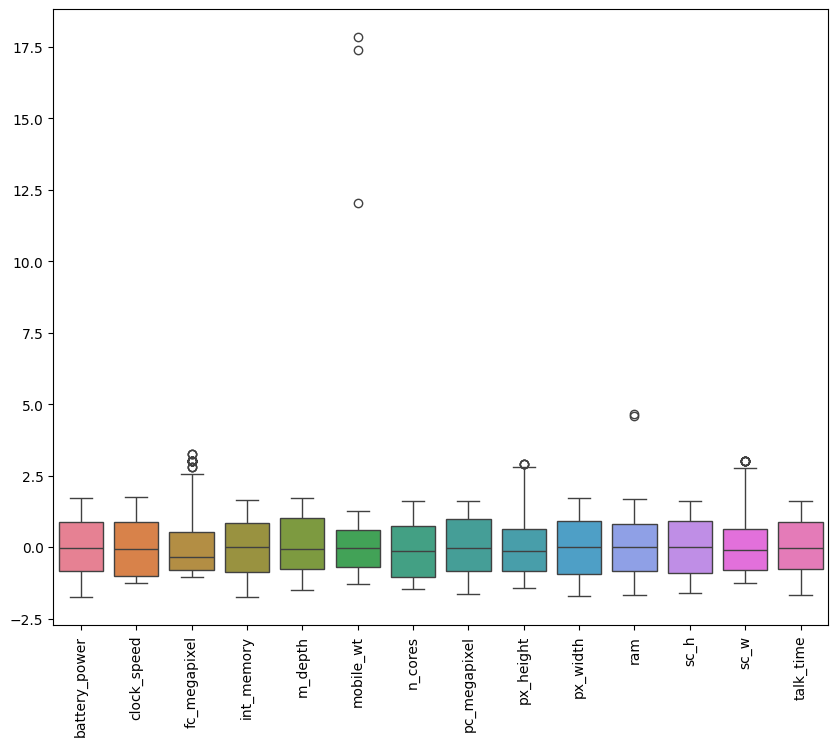

In [37]:
fig, ax = plt.subplots(figsize = (10,8))
bp = sns.boxplot(data=scaled_data)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)

In [38]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

battery_power     740.75
clock_speed         1.60
fc_megapixel        6.00
int_memory         31.00
m_depth             0.50
mobile_wt          61.00
n_cores             4.00
pc_megapixel       11.00
px_height         646.00
px_width          814.25
ram              1846.00
sc_h                8.00
sc_w                6.00
talk_time           9.00
dtype: float64


In [39]:
outliers_removed_data = numeric_data[-((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_removed_data.shape

(1690, 14)

In [40]:
numeric_data.shape

(1730, 14)

/tmp/ipykernel_39351/2477680160.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(bp.get_xticklabels(),rotation=90)


[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

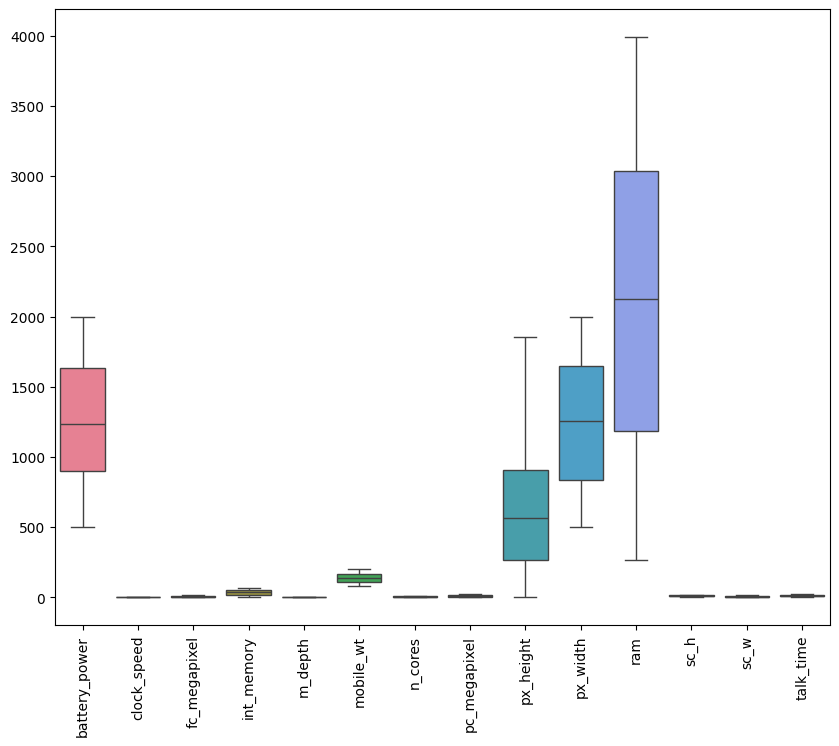

In [41]:
fig, ax = plt.subplots(figsize = (10,8))
bp = sns.boxplot(data=outliers_removed_data)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
scaled_data = scaled_data.reset_index()

In [44]:
categorical_data = categorical_data.reset_index()

In [45]:
final_df = pd.concat([scaled_data,categorical_data],axis=1)
final_df

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,...,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,-0.478081,0.299832,2.125235,-1.583724,-1.489038,1.132057,-0.586956,0.972841,-0.921551,...,0.395428,-1.665833,0,1,1,0,0,1,0,1
1,1,-0.943658,-1.261822,-0.126239,1.501188,1.011621,1.089055,0.292588,0.318417,0.268529,...,-1.266137,-0.750540,1,1,1,1,1,0,0,2
2,2,1.282816,1.501105,-0.801681,-0.371794,1.368858,0.981547,-0.586956,-0.990431,1.467763,...,1.107527,-0.201364,2,1,0,0,0,1,1,2
3,3,0.681253,-1.261822,3.025824,-0.481970,-0.060090,-0.953583,1.611904,1.627265,-0.763637,...,-1.266137,-0.750540,3,0,1,1,1,1,0,2
4,4,0.423111,-0.180677,1.449793,0.840135,-0.060090,-0.695566,0.732360,1.300053,0.275394,...,0.632794,-0.750540,4,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1725,-1.575184,1.380977,2.125235,1.225749,-0.417327,0.530017,1.611904,1.136447,-0.168597,...,0.158061,-0.750540,1995,1,1,1,1,1,1,3
1726,1726,-0.724699,-0.180677,-1.026828,0.674872,1.011621,-0.029021,-1.026728,-1.644855,-0.832295,...,-0.079305,0.164753,1996,1,1,0,1,1,1,3
1727,1727,1.036198,0.419959,-1.026828,1.115574,-0.060090,0.637524,1.172132,1.136447,0.035090,...,0.632794,0.713928,1997,1,0,1,1,1,0,0
1728,1728,-0.150794,-0.180677,-0.801681,-1.418461,-0.060090,-1.297606,-1.466500,0.318417,-0.347109,...,-1.266137,0.530870,1999,0,0,1,1,0,0,3


In [46]:
final_df.isnull().sum()

index            0
battery_power    0
clock_speed      0
fc_megapixel     0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
index            0
bluetooth        0
dual_sim         0
four_g           0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [47]:
X = final_df.drop('price_range',axis=1)
y = final_df['price_range']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 101)

In [49]:
X_train.shape, X_test.shape

((1384, 22), (346, 22))

In [50]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=10000)

In [51]:
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
logistic_model.score(X_test,y_test)

0.20520231213872833